In [1]:
!pip install category_encoders
import pandas as pd
import numpy as np
import chardet
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.impute import SimpleImputer # imputation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [2]:

 from google.colab import drive
 drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Load test dataset
train = pd.read_csv('/content/drive/MyDrive/dataset/train.xlsx - train.csv.csv')
#explore dataset
print(train.head())

             Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms 

In [4]:
test = pd.read_csv('/content/drive/MyDrive/dataset/test.xlsx - test.csv.csv')
#explore dataset
print(test.head())

       Artist Name                                Track Name  Popularity  \
0      David Bowie              Space Oddity - 2015 Remaster        73.0   
1      Crimson Sun                       Essence of Creation        34.0   
2             P!nk                          Raise Your Glass        78.0   
3     Shawn Mendes                                    Wonder        80.0   
4  Backstreet Boys  Helpless When She Smiles - Radio Version        48.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.310   0.403   NaN   -13.664     1       0.0326       0.07260   
1         0.511   0.955   1.0    -5.059     1       0.1290       0.00040   
2         0.700   0.709   7.0    -5.006     1       0.0839       0.00480   
3         0.333   0.637   1.0    -4.904     0       0.0581       0.13100   
4         0.393   0.849  11.0    -4.114     1       0.0459       0.00421   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0          0.00

# Handle Missing Values

In [5]:
train.isnull().sum()


Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

# Since the missing values are very few compared to the total entries, we will replace them with 0

In [6]:
train.fillna(0,inplace=True)

In [7]:
train.isnull().sum()


Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [8]:
train[train.isna().any(axis=1)]


Empty DataFrame
Columns: [Artist Name, Track Name, Popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_in min/ms, time_signature, Class]
Index: []

# EDA

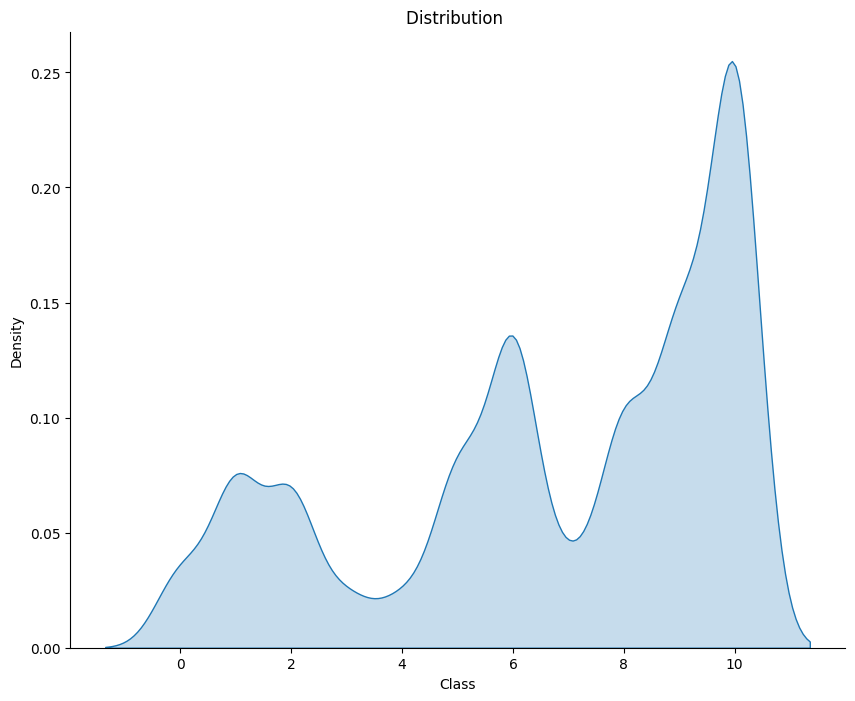

In [9]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = train , x = train.Class , fill = True , common_norm=False)
plt.title('Distribution ')
sns.despine()
plt.show()

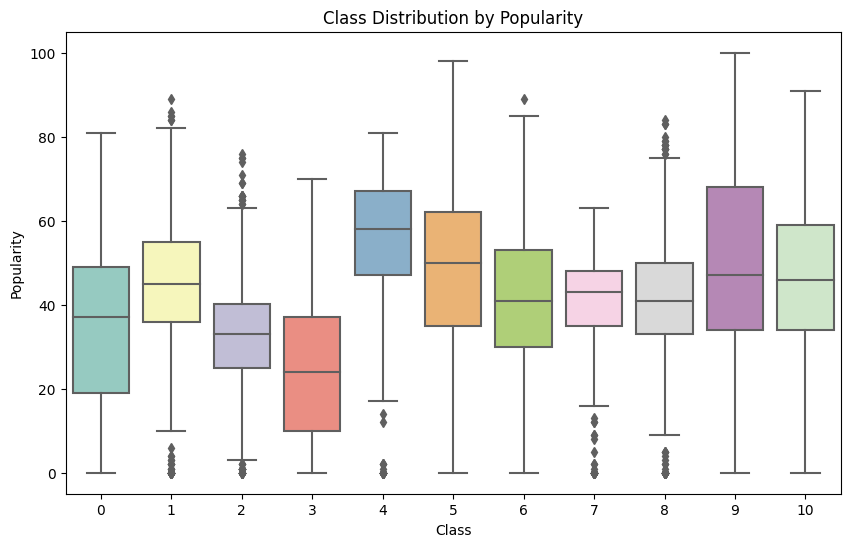

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Popularity', data=train, palette='Set3')
plt.xlabel('Class')
plt.ylabel('Popularity')
plt.title('Class Distribution by Popularity')
plt.show()

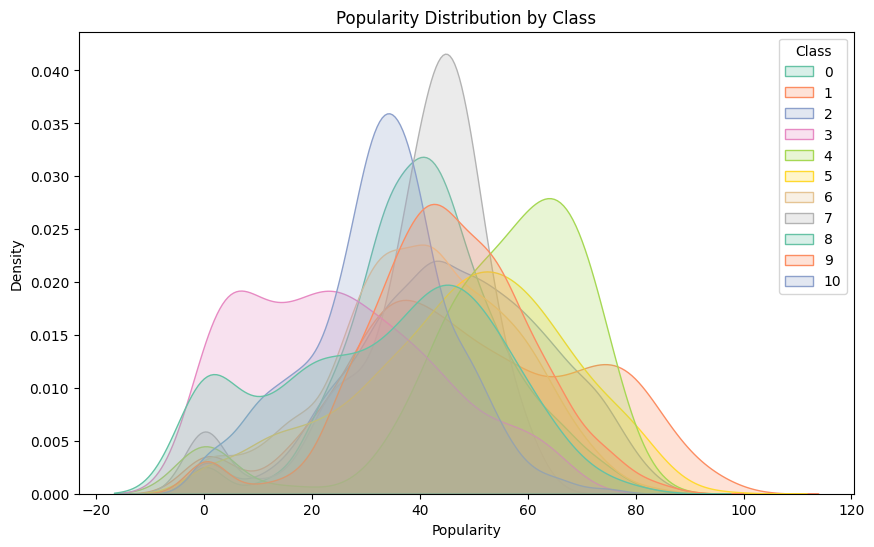

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train, x='Popularity', hue='Class', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Popularity Distribution by Class')
plt.show()

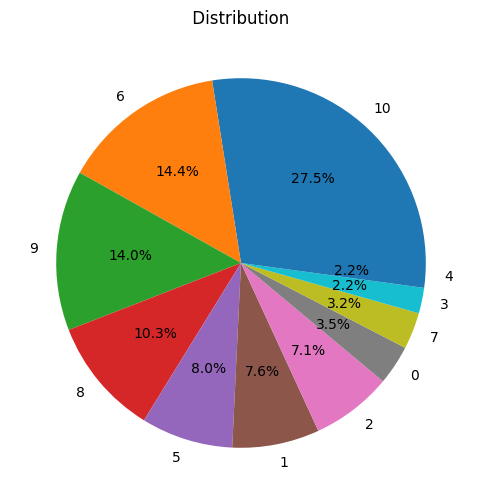

In [12]:
plt.figure(figsize=(6, 6))
Class_counts = train['Class'].value_counts()
plt.pie(Class_counts, labels=Class_counts.index, autopct='%1.1f%%')
plt.title(' Distribution ')
plt.show()

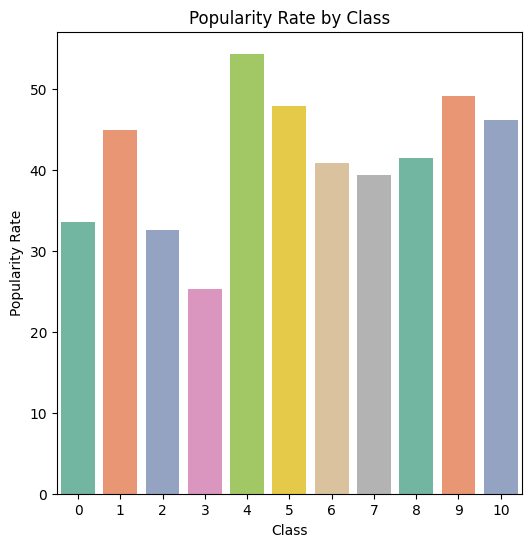

In [13]:
Class_Popularity_rate = train.groupby('Class')['Popularity'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=Class_Popularity_rate.index, y=Class_Popularity_rate.values, palette='Set2')
plt.xlabel('Class')
plt.ylabel('Popularity Rate')
plt.title('Popularity Rate by Class')
plt.show()

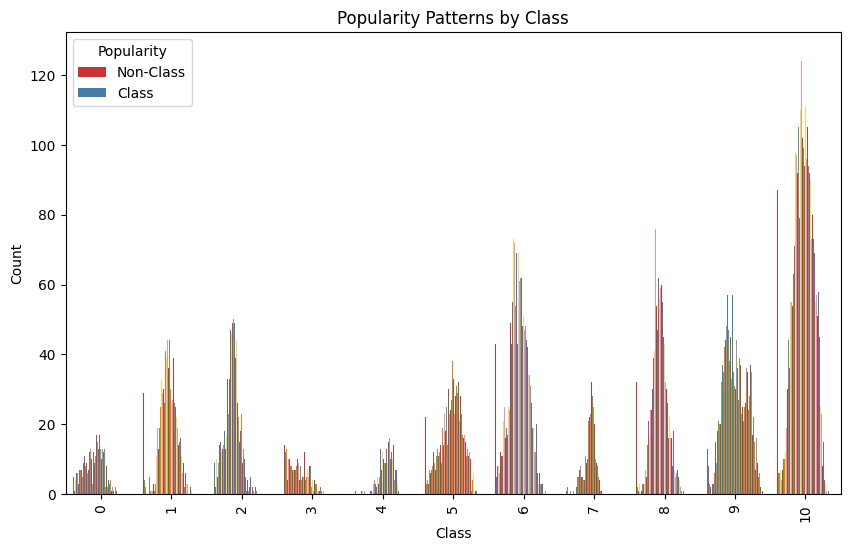

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Popularity', data=train, palette='Set1')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Popularity Patterns by Class')
plt.legend(title='Popularity', labels=['Non-Class', 'Class'])
plt.xticks(rotation=90)
plt.show()

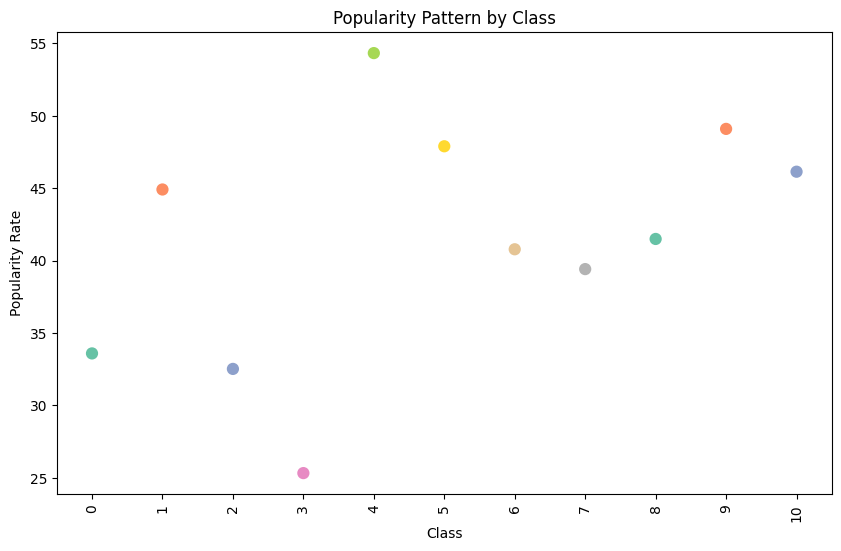

In [15]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Class', y='Popularity', data=train, errorbar=None,  palette='Set2')
plt.xlabel('Class')
plt.ylabel('Popularity Rate')
plt.title('Popularity Pattern by Class')
plt.xticks(rotation=90)
plt.show()

# Inpedendent features correlation with prediction labels

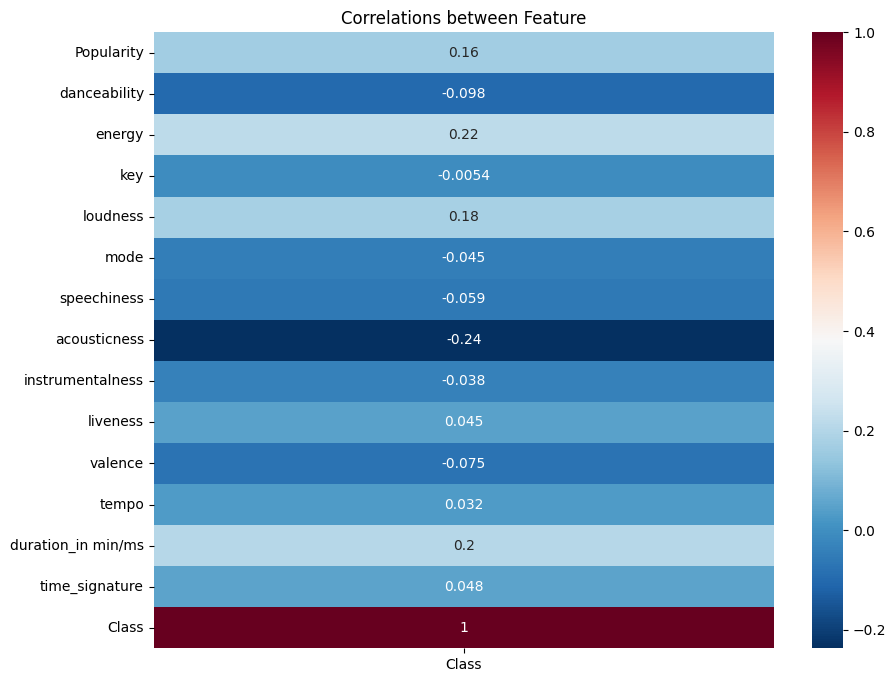

In [16]:
corr_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Class']], annot=True, cmap='RdBu_r')
plt.title('Correlations between Feature')
plt.show()

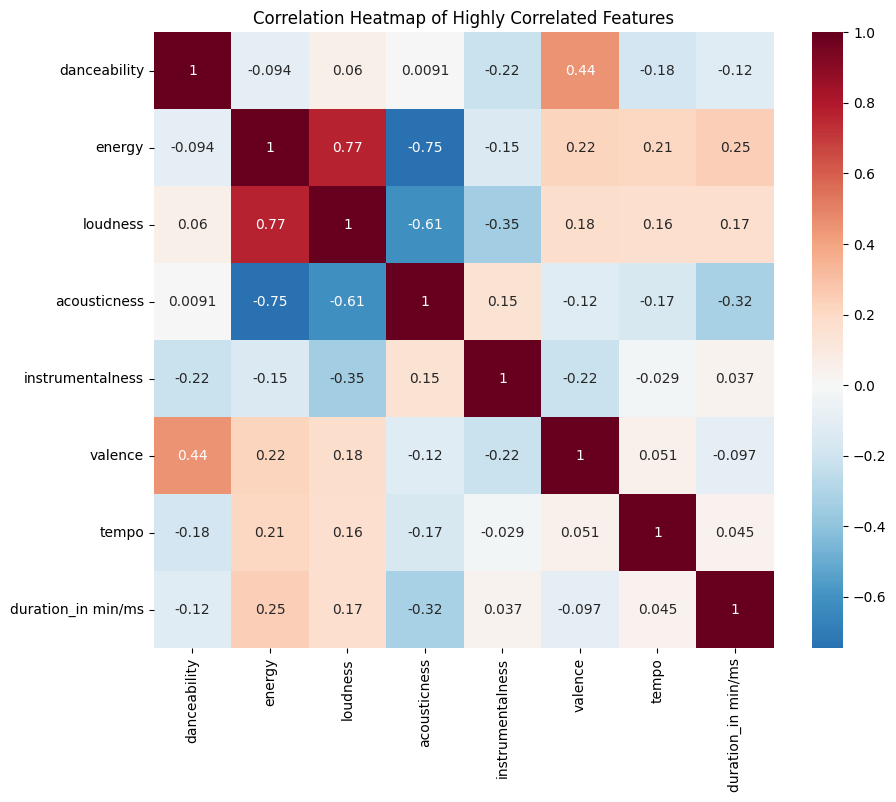

In [17]:
corr_matrix = train.drop(columns=['Class']).corr(numeric_only=True)

high_corr_features = []
for column in corr_matrix.columns:
    max_corr = corr_matrix[column].drop(index=column).abs().max()
    if max_corr > 0.2:
        high_corr_features.append(column)

plt.figure(figsize=(10, 8))
sns.heatmap(train[high_corr_features].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Highly Correlated Features')
plt.show()

# Split The Training Dataset


# Split data

In [18]:
Y = train["Class"]
X = train.drop(["Class", "Artist Name", "Track Name"], axis=1)
cat_cols = X.select_dtypes("category").columns
num_cols = X.select_dtypes(include=np.number).columns
print(cat_cols)
print(num_cols)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Index([], dtype='object')
Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature'],
      dtype='object')


# Random Forrest. Model training and testing

In [19]:
cat_features = train.drop(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'], axis=1)

In [20]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Artist Name', 'Track Name', 'Popularity', 'key', 'instrumentalness'])
train = encoder.fit_transform(train)


In [21]:
dataset = train.values

X = dataset[:,0:16]#features
y = dataset[:,16]#label

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4) # 70% training and 30% test

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12597, 16)
(12597,)
(5399, 16)
(5399,)


In [24]:
!pip install lazypredict

import lazypredict
from lazypredict.Supervised import LazyClassifier

In [25]:
# we will use lazypredict to find the perfect model. check the full list of classifier models
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [26]:
# select the models to test
lazypredict.Supervised.CLASSIFIERS = lazypredict.Supervised.CLASSIFIERS[0:11] + lazypredict.Supervised.CLASSIFIERS[15:17] \
                                        + lazypredict.Supervised.CLASSIFIERS[19:25]

In [27]:
# check the list again
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression),
 ('NearestCentroid', sklearn.neighbors._nearest_centroid.NearestCentroid),
 ('Perceptron', sklearn.linear_model._perceptron.Perceptron),
 ('QuadraticDiscriminantAnalysis',
  sklearn.discrimina

In [28]:
clf = LazyClassifier(verbose= 1,ignore_warnings=True, custom_metric= None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  5%|▌         | 1/19 [00:02<00:49,  2.77s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.3785886275236155, 'Balanced Accuracy': 0.2869385507459603, 'ROC AUC': None, 'F1 Score': 0.33456833187691243, 'Time taken': 2.76707124710083}


 11%|█         | 2/19 [00:04<00:39,  2.35s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.4376736432672717, 'Balanced Accuracy': 0.48863784552539985, 'ROC AUC': None, 'F1 Score': 0.4329277924906582, 'Time taken': 2.0471177101135254}
{'Model': 'BernoulliNB', 'Accuracy': 0.37618077421744767, 'Balanced Accuracy': 0.3582499246980005, 'ROC AUC': None, 'F1 Score': 0.3382932918313791, 'Time taken': 0.057440757751464844}


 21%|██        | 4/19 [01:01<04:40, 18.67s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.47897758844230415, 'Balanced Accuracy': 0.4694853211913807, 'ROC AUC': None, 'F1 Score': 0.43769326047624185, 'Time taken': 56.712079763412476}


 42%|████▏     | 8/19 [01:02<01:05,  5.97s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.34821263196888314, 'Balanced Accuracy': 0.40786045834195883, 'ROC AUC': None, 'F1 Score': 0.35470755054437486, 'Time taken': 0.45184946060180664}
{'Model': 'DummyClassifier', 'Accuracy': 0.2763474717540285, 'Balanced Accuracy': 0.09090909090909091, 'ROC AUC': None, 'F1 Score': 0.11966635549470629, 'Time taken': 0.04190468788146973}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.2928320059270235, 'Balanced Accuracy': 0.30208948978986555, 'ROC AUC': None, 'F1 Score': 0.2980534313634287, 'Time taken': 0.07213807106018066}


 47%|████▋     | 9/19 [01:05<00:54,  5.45s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.47731061307649564, 'Balanced Accuracy': 0.4933645683376955, 'ROC AUC': None, 'F1 Score': 0.4570415990072504, 'Time taken': 3.6032350063323975}
{'Model': 'GaussianNB', 'Accuracy': 0.42600481570661236, 'Balanced Accuracy': 0.47398336729782903, 'ROC AUC': None, 'F1 Score': 0.3951375942737186, 'Time taken': 0.06293058395385742}


 58%|█████▊    | 11/19 [01:06<00:28,  3.51s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.37655121318762735, 'Balanced Accuracy': 0.415866867111168, 'ROC AUC': None, 'F1 Score': 0.3759422285829682, 'Time taken': 0.9103593826293945}


 63%|██████▎   | 12/19 [01:07<00:20,  2.92s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.4813854417484719, 'Balanced Accuracy': 0.48562899323212905, 'ROC AUC': None, 'F1 Score': 0.44434848794527365, 'Time taken': 0.7722177505493164}
{'Model': 'NearestCentroid', 'Accuracy': 0.3893313576588257, 'Balanced Accuracy': 0.49109099735963807, 'ROC AUC': None, 'F1 Score': 0.36838729565163325, 'Time taken': 0.08760595321655273}


 74%|███████▎  | 14/19 [01:07<00:09,  1.84s/it]

{'Model': 'Perceptron', 'Accuracy': 0.29931468790516763, 'Balanced Accuracy': 0.27195327300546174, 'ROC AUC': None, 'F1 Score': 0.29779602907792685, 'Time taken': 0.13396954536437988}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.45026856825338024, 'Balanced Accuracy': 0.4941735486431104, 'ROC AUC': None, 'F1 Score': 0.4244369316244206, 'Time taken': 0.08218789100646973}


 84%|████████▍ | 16/19 [01:13<00:06,  2.20s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.4887942211520652, 'Balanced Accuracy': 0.5204803165598594, 'ROC AUC': None, 'F1 Score': 0.4729312822807298, 'Time taken': 5.624541997909546}
{'Model': 'RidgeClassifier', 'Accuracy': 0.43007964437858864, 'Balanced Accuracy': 0.31615716638658226, 'ROC AUC': None, 'F1 Score': 0.35643073193004754, 'Time taken': 0.07318592071533203}


 95%|█████████▍| 18/19 [01:13<00:01,  1.50s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.43007964437858864, 'Balanced Accuracy': 0.31615716638658226, 'ROC AUC': None, 'F1 Score': 0.3564263501076138, 'Time taken': 0.1385340690612793}


100%|██████████| 19/19 [01:14<00:00,  3.91s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.4097055010187072, 'Balanced Accuracy': 0.4377012652043941, 'ROC AUC': None, 'F1 Score': 0.375815543193137, 'Time taken': 0.6274845600128174}


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.49               0.52    None      0.47   
QuadraticDiscriminantAnalysis      0.45               0.49    None      0.42   
ExtraTreesClassifier               0.48               0.49    None      0.46   
NearestCentroid                    0.39               0.49    None      0.37   
BaggingClassifier                  0.44               0.49    None      0.43   
LogisticRegression                 0.48               0.49    None      0.44   
GaussianNB                         0.43               0.47    None      0.40   
CalibratedClassifierCV             0.48               0.47    None      0.44   
SGDClassifier                      0.41               0.44    None      0.38   
KNeighborsClassifier               0.38               0.42    None      0.38   
DecisionTreeClassifier             0.35               0.41    None      0.35   
BernoulliNB                        0.38               0.36    None      0.34   
RidgeClassifier                    0.43               0.32    None      0.36   
RidgeClassifierCV                  0.43               0.32    None      0.36   
ExtraTreeClassifier                0.29               0.30    None      0.30   
AdaBoostClassifier                 0.38               0.29    None      0.33   
Perceptron                         0.30               0.27    None      0.30   
DummyClassifier                    0.28               0.09    None      0.12   

                               Time Taken  
Model                                      
RandomForestClassifier               5.62  
QuadraticDiscriminantAnalysis        0.08  
ExtraTreesClassifier                 3.60  
NearestCentroid                      0.09  
BaggingClassifier                    2.05  
LogisticRegression                   0.77  
GaussianNB                           0.06  
CalibratedClassifierCV              56.71  
SGDClassifier                        0.63  
KNeighborsClassifier                 0.91  
DecisionTreeClassifier               0.45  
BernoulliNB                          0.06  
RidgeClassifier                      0.07  
RidgeClassifierCV                    0.14  
ExtraTreeClassifier                  0.07  
AdaBoostClassifier                   2.77  
Perceptron                           0.13  
DummyClassifier                      0.04

#Model Building

In [29]:
# Obtain target and predictors
y = train.Class
features =['Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature']
X = train[features].copy()

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [31]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.29%
_______________________________________________
CLASSIFICATION REPORT:
             0.0    1.0    2.0    3.0    4.0     5.0     6.0    7.0     8.0  \
precision   1.00   0.68   0.95   1.00   1.00    0.97    0.91   1.00    0.93   
recall      1.00   1.00   0.99   1.00   1.00    1.00    0.85   1.00    1.00   
f1-score    1.00   0.81   0.97   1.00   1.00    0.99    0.88   1.00    0.96   
support   450.00 957.00 911.00 272.00 261.00 1013.00 1828.00 395.00 1301.00   

              9.0    10.0  accuracy  macro avg  weighted avg  
precision    0.97    1.00      0.93       0.95          0.94  
recall       0.95    0.86      0.93       0.97          0.93  
f1-score     0.96    0.93      0.93       0.95          0.93  
support   1752.00 3457.00      0.93   12597.00      12597.00  
_______________________________________________
Confusion Matrix: 
 [[ 450    0    0    0    0    0    0    0    0    0    0]
 [   0  957    0    0    0    0    0    0    0    0    

# Visualising the Decision Tree

In [32]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(train.columns)
features.remove("Class")

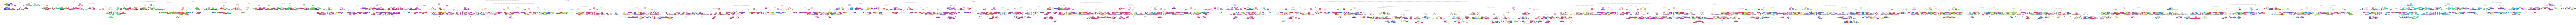

In [33]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=128)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.29%
_______________________________________________
CLASSIFICATION REPORT:
             0.0    1.0    2.0    3.0    4.0     5.0     6.0    7.0     8.0  \
precision   1.00   0.81   0.97   1.00   1.00    0.99    0.88   1.00    0.96   
recall      1.00   0.75   0.96   1.00   1.00    0.99    0.87   1.00    0.96   
f1-score    1.00   0.78   0.97   1.00   1.00    0.99    0.88   1.00    0.96   
support   450.00 957.00 911.00 272.00 261.00 1013.00 1828.00 395.00 1301.00   

              9.0    10.0  accuracy  macro avg  weighted avg  
precision    0.96    0.91      0.93       0.95          0.93  
recall       0.96    0.94      0.93       0.95          0.93  
f1-score     0.96    0.93      0.93       0.95          0.93  
support   1752.00 3457.00      0.93   12597.00      12597.00  
_______________________________________________
Confusion Matrix: 
 [[ 450    0    0    0    0    0    0    0    0    0    0]
 [   0  716    2    0    0    1  139    0    0    4   9

In [35]:
# break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [55]:
dataset = train.values

X = dataset[:,0:14]#features
y = dataset[:,14]#label

In [59]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3 , random_state = 0)

In [60]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = regressor.predict(X_test)

In [36]:
# Accuracy score
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

In [37]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

#Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("Accuracy IMputation :")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

Accuracy IMputation :
0.48638888888888887


In [38]:
my_imputer = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

#Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("Accuracy IMputation :")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

Accuracy IMputation :
0.48638888888888887


In [39]:
final_imputer=SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.fit_transform(X_valid))

#Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

In [40]:
# Define and fit model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)

# Get validation predictions and Accuracy
preds_valid = model.predict(final_X_valid)
print("Accuracy:")
print(accuracy_score(y_valid, preds_valid))

Accuracy:
0.48638888888888887


In [41]:
#Assigning Churn to outcome variable (y)
y = train.Class


# Tree Based feature selection




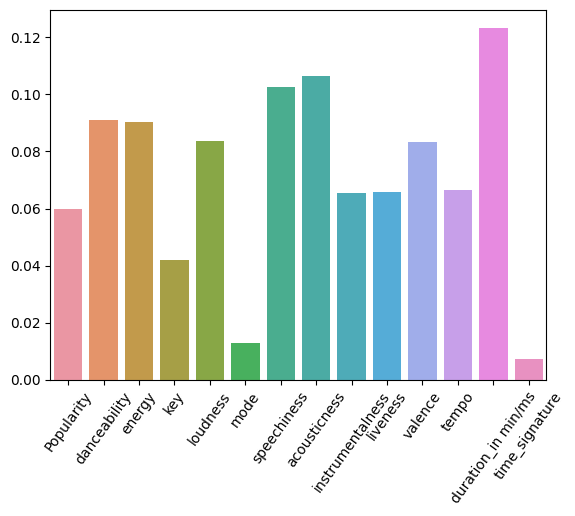

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

sns.barplot(x=X_train.columns.tolist(), y= rf.feature_importances_)
plt.xticks(rotation=54)
plt.show()

# Visualizing

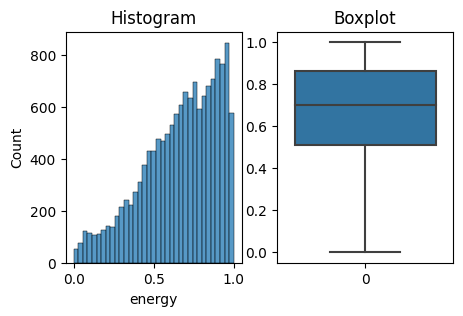

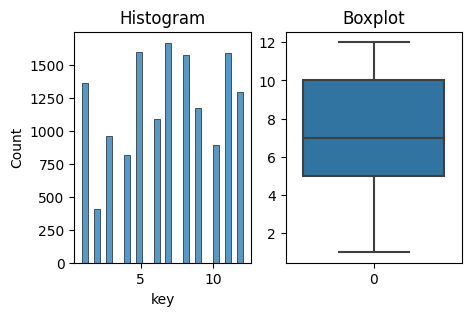

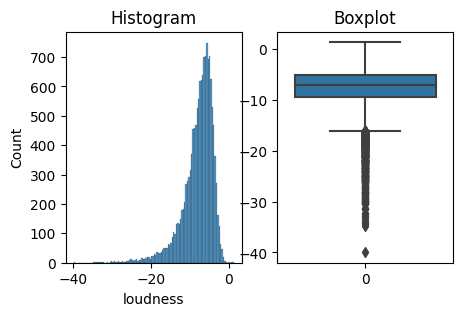

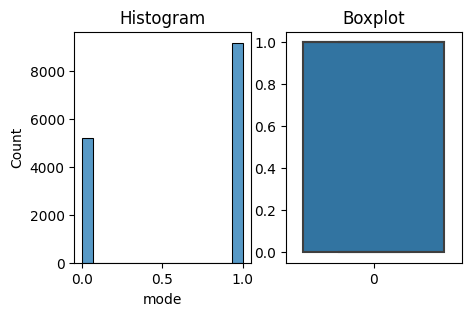

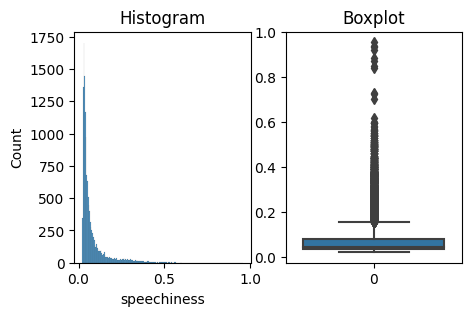

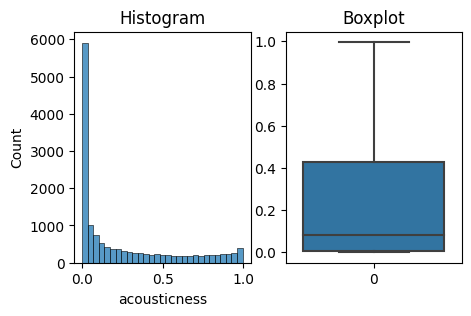

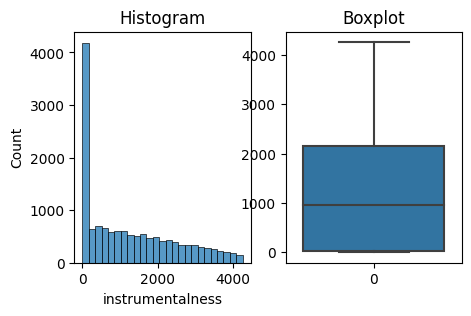

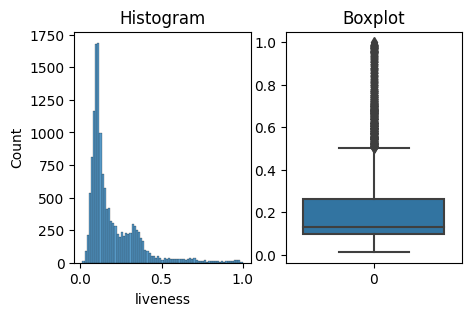

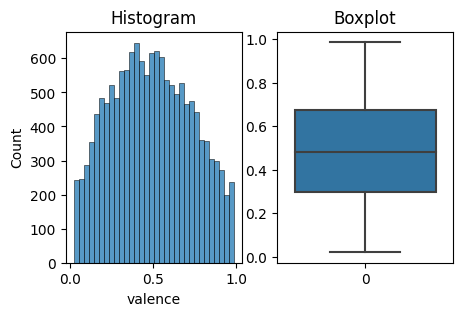

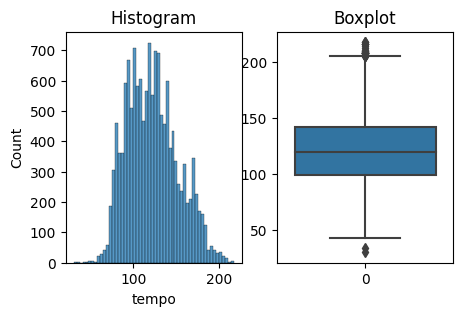

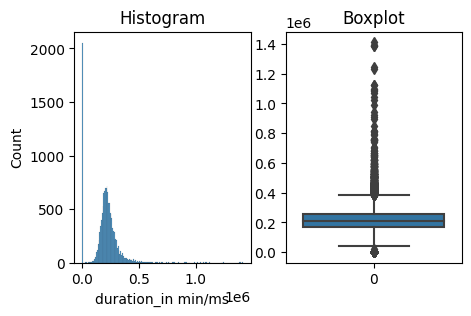

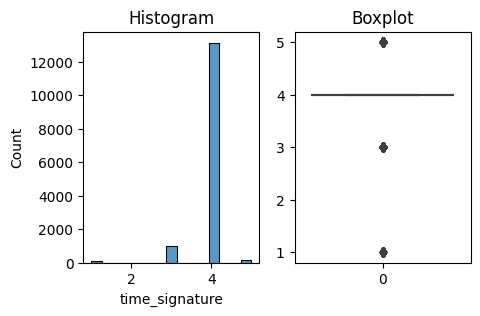

In [43]:
for i in range(2,len(X_train.columns)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3))
    sns.histplot(X_train.iloc[:, i], ax=ax1)
    ax1.set_title('Histogram')
    sns.boxplot(X_train.iloc[:, i], ax=ax2)
    ax2.set_title('Boxplot')
    plt.show()

In [44]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [45]:
#plot libaries
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode

configure_plotly_browser_state()

init_notebook_mode(connected=False)# to show plots in notebook



layout = dict(
    yaxis=dict(
        title='duration_in min/ms',
        automargin=True,
    ),
    xaxis=dict(
        title='Class',
        automargin=True,
    ),
)
fig = go.Figure(layout=layout)
# Add traces

fig.add_trace(go.Scatter(x=train['Class'], y=train['duration_in min/ms'],text= train['Popularity'],
                    mode='markers',
                    name='Popularity',
                    hovertemplate="%{text}",
                    marker=dict(
                        size=8,
                        color = train['Popularity'],
                        colorscale='rainbow', # one of plotly colorscales
                        showscale=True
                    ))
            )
fig.update_layout(
    autosize=False,
    width=800,
    height=800
    )
fig.show()

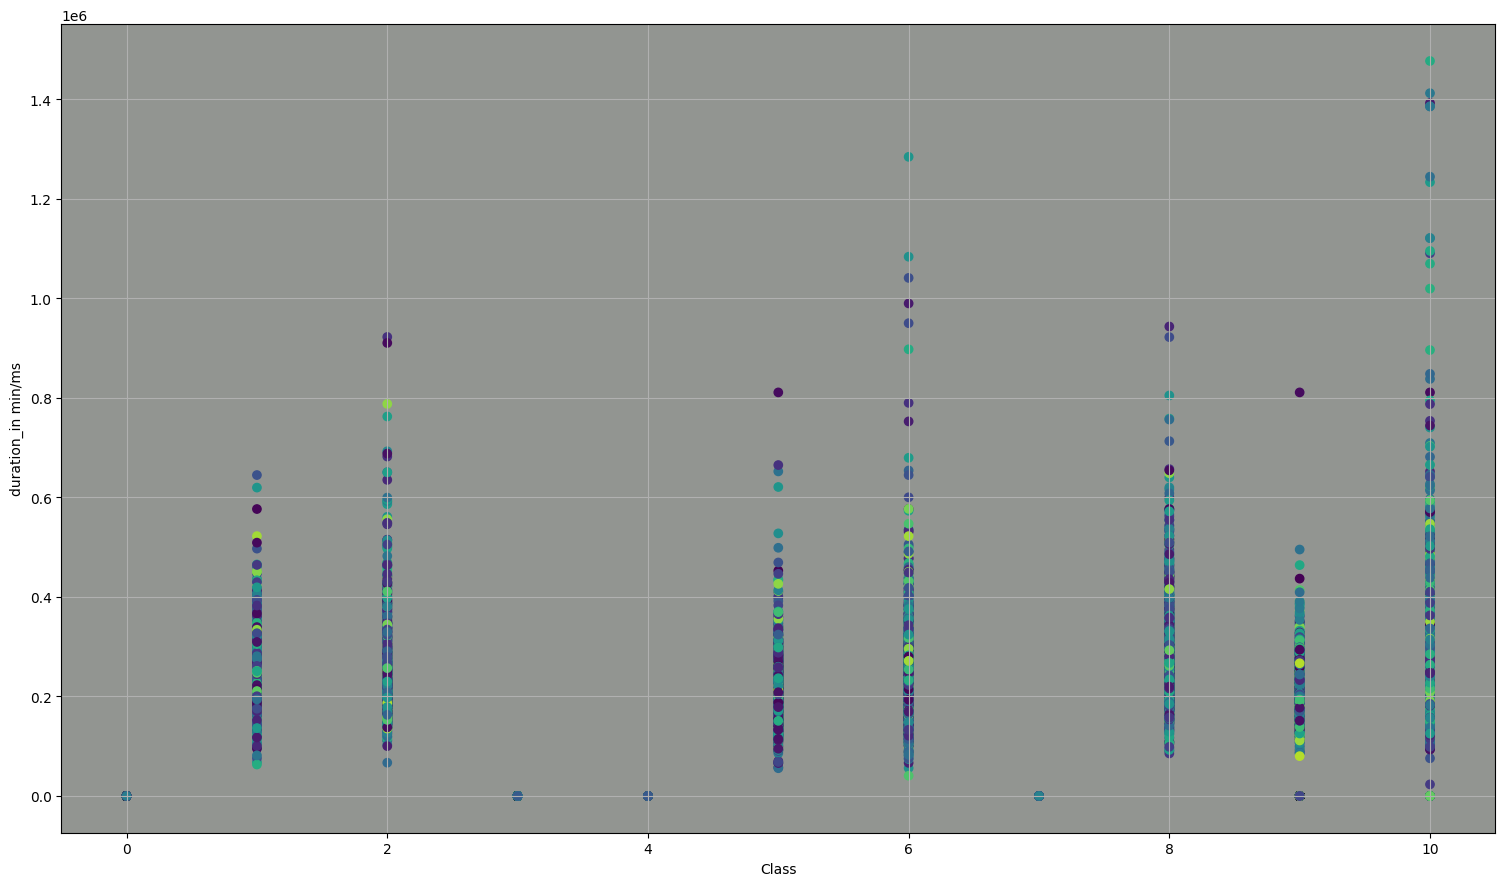

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.set_facecolor('xkcd:grey')
scatter = plt.scatter( train['Class'],train['duration_in min/ms'], c=train['Popularity'])
plt.xlabel('Class')
plt.ylabel('duration_in min/ms')
plt.grid(True)
plt.show()

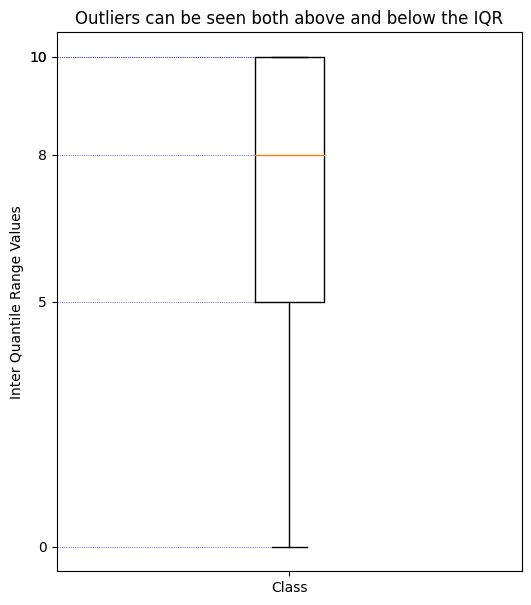

In [47]:
fig = plt.figure(1, figsize=(6, 7))
ax = fig.add_subplot(111)

ax.set_title('Outliers can be seen both above and below the IQR')

ax.boxplot(train['Class'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
# ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['Class'])

quantiles = np.quantile(train['Class'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
plt.show()

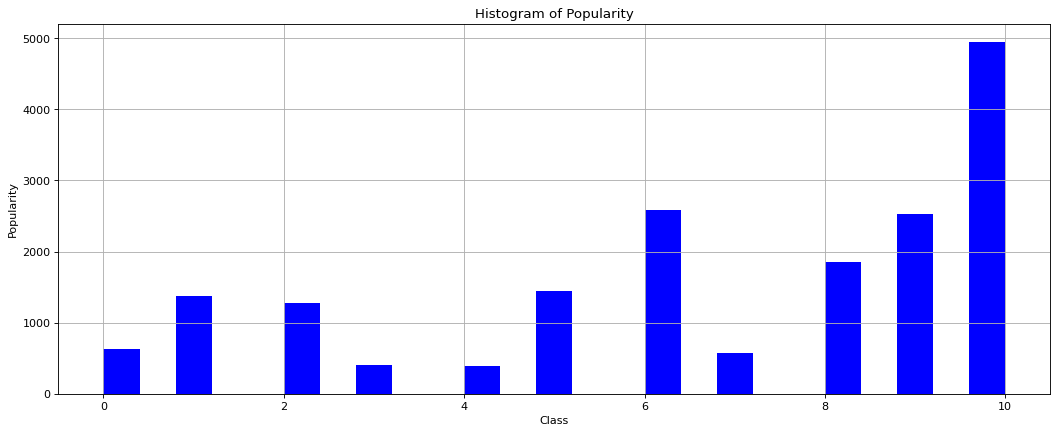

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(figsize=(16, 6), dpi=80)

# the histogram of the data
plt.hist(train['Class'],25, facecolor='b')

plt.xlabel('Class')
plt.ylabel('Popularity')
plt.title('Histogram of Popularity')
plt.grid(True)
plt.show()

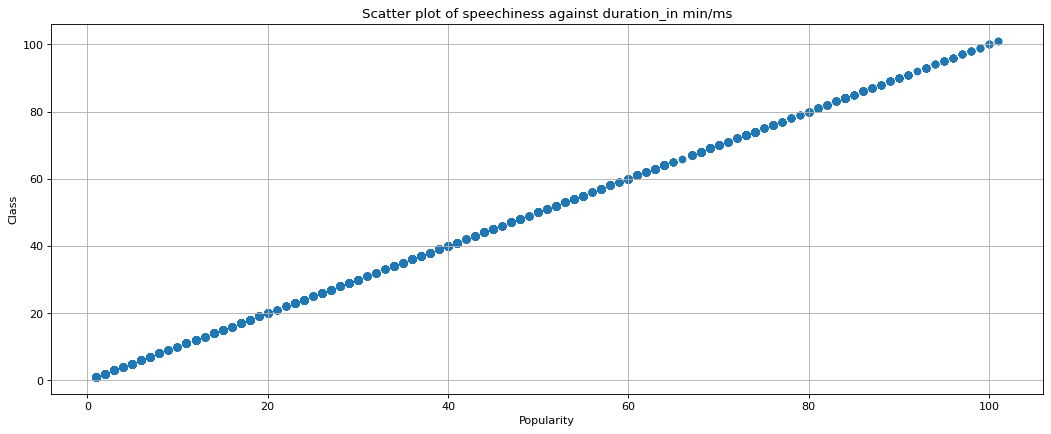

In [49]:
figure(figsize=(16, 6), dpi=80)

plt.scatter(train['Popularity'], train['Popularity'])

plt.xlabel('Popularity')
plt.ylabel('Class')

plt.title('Scatter plot of speechiness against duration_in min/ms')

plt.grid(True)
plt.show()